,Inflation
Month,
2005-01-01,7.3
2005-02-01,7.3
2005-03-01,7.1
2005-04-01,7.2
2005-05-01,7.3


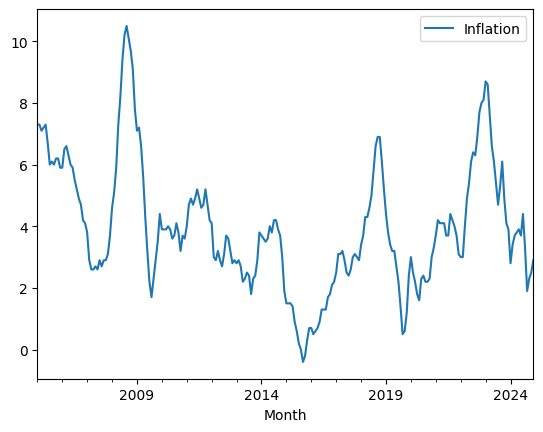

In [28]:
from utils import adf_test
import pandas as pd


df = pd.read_csv("data/inflation.csv", parse_dates=True, index_col="Month")
df = df[df.index >= "2005-01-01"]
df.plot()
df.head()

Split -- Total: 240, Train: 192, Test: 48
The Inflation is Stationary (p-value: 0.0485958) | (Statistic: -2.8729)


np.True_

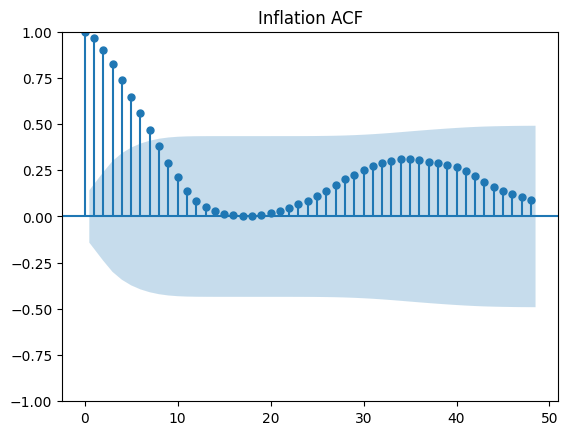

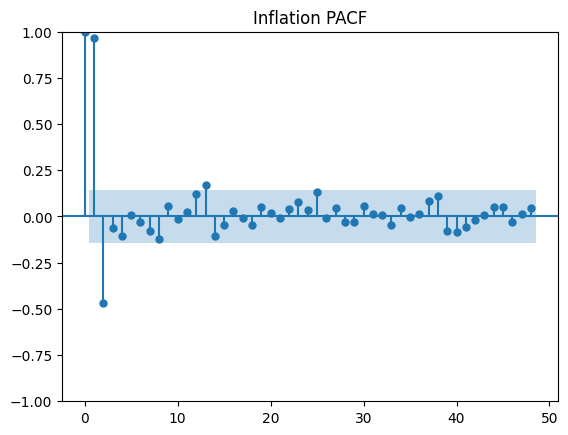

In [29]:
from utils import plot_autocorrelations, adf_test, split_fixed, split_ratio

train, test = split_ratio(df["Inflation"])
plot_autocorrelations(train)
adf_test(train)

In [30]:
from models import arima_grid_search
import warnings
warnings.filterwarnings("ignore")

model, data, model_list = arima_grid_search(train, test, d=0, possible_ar=[0,1,2, 13], possible_ma=range(0,8), criteria="aic", log=False, remove_insignificant=True)
model_list


The Inflation is Stationary (p-value: 0.0485958) | (Statistic: -2.8729)


,text,order,aic,bic,mape,mae,mse,significant
10,"ARIMA(1, 0, 3)","(1, 0, 3)",188.897550,208.442522,26.654455,1.378040,3.696494,True
11,"ARIMA(2, 0, 0)","(2, 0, 0)",189.549335,202.579317,26.135709,1.351473,3.622925,True
9,"ARIMA(1, 0, 2)","(1, 0, 2)",199.156554,215.444031,27.719195,1.433930,3.873390,True
8,"ARIMA(1, 0, 1)","(1, 0, 1)",201.843576,214.873557,28.177706,1.460321,3.974629,True
6,"ARIMA(0, 0, 7)","(0, 0, 7)",210.941254,240.258712,25.541426,1.349837,3.766343,True
5,"ARIMA(0, 0, 5)","(0, 0, 5)",240.044639,262.847106,26.999715,1.419419,3.893613,True
7,"ARIMA(1, 0, 0)","(1, 0, 0)",269.438896,279.211382,28.329295,1.476573,4.083307,True
4,"ARIMA(0, 0, 4)","(0, 0, 4)",270.608093,290.153066,26.604510,1.401770,3.861124,True
3,"ARIMA(0, 0, 3)","(0, 0, 3)",335.271551,351.559027,26.055902,1.382788,3.862302,True
2,"ARIMA(0, 0, 2)","(0, 0, 2)",441.720911,454.750892,26.510288,1.401149,3.885094,True


In [31]:
model_list.sort_values("bic")

,text,order,aic,bic,mape,mae,mse,significant
11,"ARIMA(2, 0, 0)","(2, 0, 0)",189.549335,202.579317,26.135709,1.351473,3.622925,True
10,"ARIMA(1, 0, 3)","(1, 0, 3)",188.897550,208.442522,26.654455,1.378040,3.696494,True
8,"ARIMA(1, 0, 1)","(1, 0, 1)",201.843576,214.873557,28.177706,1.460321,3.974629,True
9,"ARIMA(1, 0, 2)","(1, 0, 2)",199.156554,215.444031,27.719195,1.433930,3.873390,True
6,"ARIMA(0, 0, 7)","(0, 0, 7)",210.941254,240.258712,25.541426,1.349837,3.766343,True
5,"ARIMA(0, 0, 5)","(0, 0, 5)",240.044639,262.847106,26.999715,1.419419,3.893613,True
7,"ARIMA(1, 0, 0)","(1, 0, 0)",269.438896,279.211382,28.329295,1.476573,4.083307,True
4,"ARIMA(0, 0, 4)","(0, 0, 4)",270.608093,290.153066,26.604510,1.401770,3.861124,True
3,"ARIMA(0, 0, 3)","(0, 0, 3)",335.271551,351.559027,26.055902,1.382788,3.862302,True
2,"ARIMA(0, 0, 2)","(0, 0, 2)",441.720911,454.750892,26.510288,1.401149,3.885094,True


In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Inflation   No. Observations:                  192
Model:                 ARIMA(1, 0, 3)   Log Likelihood                 -88.449
Date:                Fri, 02 May 2025   AIC                            188.898
Time:                        17:44:40   BIC                            208.443
Sample:                    01-01-2005   HQIC                           196.813
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9491      0.691      5.715      0.000       2.595       5.303
ar.L1          0.9195      0.032     28.611      0.000       0.857       0.982
ma.L1          0.6657      0.072      9.193      0.000       0.524       0.808
ma.L2          0.3267      0.081      4.028      0.000       0.168       0.486
ma.L3          0.2992      0.069      4.325      0.000       0.164       0.435
sigma2         0.1440      0.017      8.258      0.000       0.110       0.178
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.20
Prob(Q):                              0.97   Prob(JB):                         0.33
Heteroskedasticity (H):               0.65   Skew:                             0.10
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

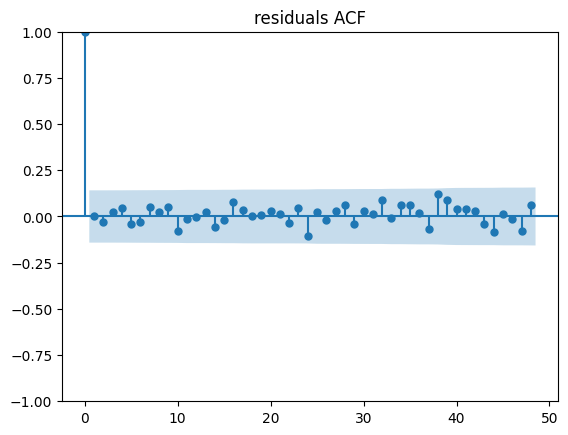

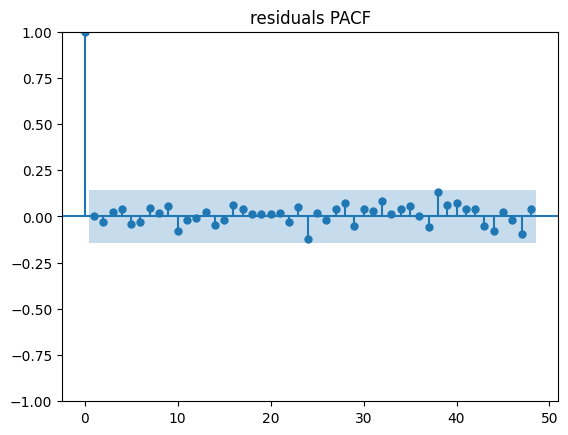

In [33]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(13,0,7)).fit()

plot_autocorrelations(
    pd.DataFrame(model.resid, columns=["residuals"])["residuals"],
)

<Axes: xlabel='Month'>

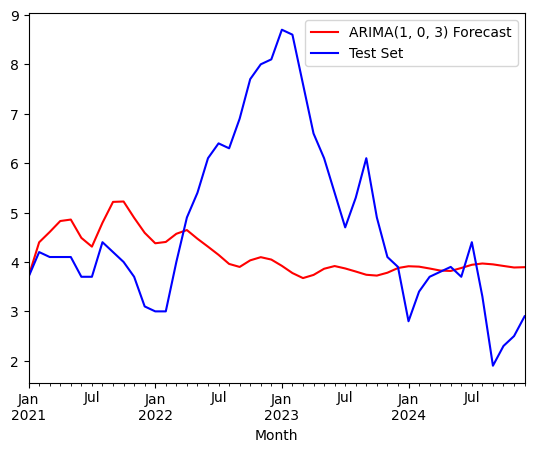

In [34]:
model.forecast(len(test)).plot(label=f"{data["text"]} Forecast", color="red", legend=True)
test.plot(label="Test Set", color="blue", legend=True)

In [35]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(model.resid, lags=1, return_df=True)

,lb_stat,lb_pvalue
1,0.005351,0.941689


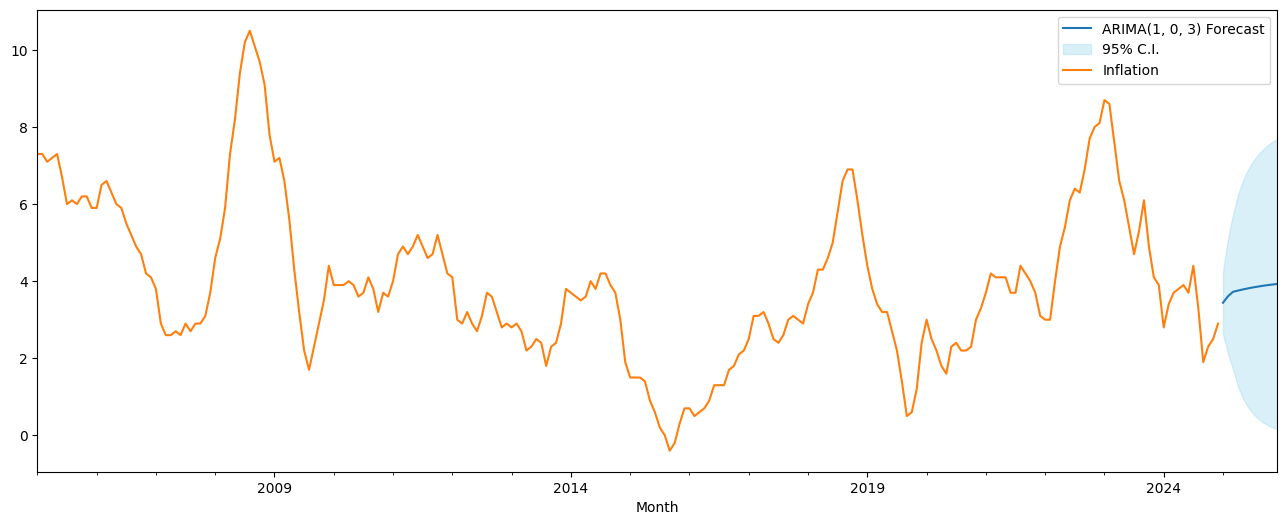

In [37]:
from models import ARIMA_forecast

ARIMA_forecast(df["Inflation"], 12, order=data.order)